## Project 1: House Price Prediction
## 1. Problem Definition
### Predict house prices based on feature like size, location, and amenities. 
### We will use linear regression model first

Dataset shape: (20640, 9)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of our dataset:    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Statistical summary:              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.09667

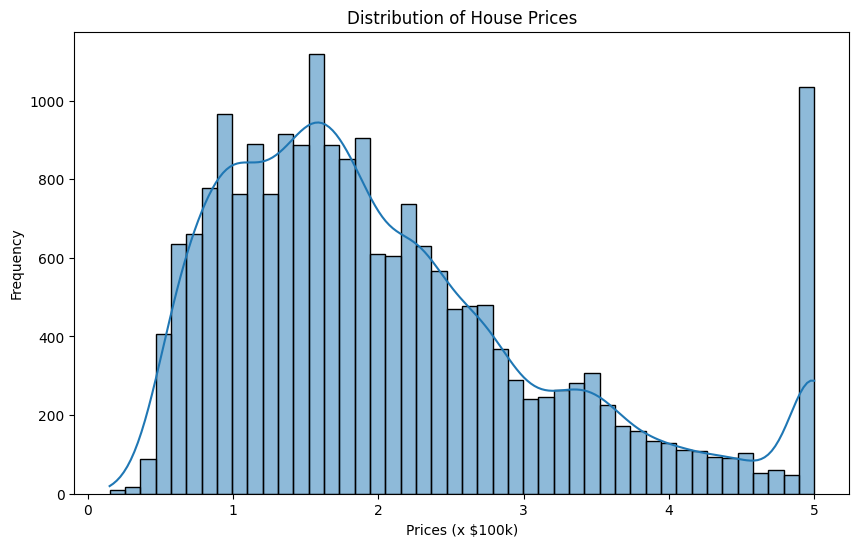

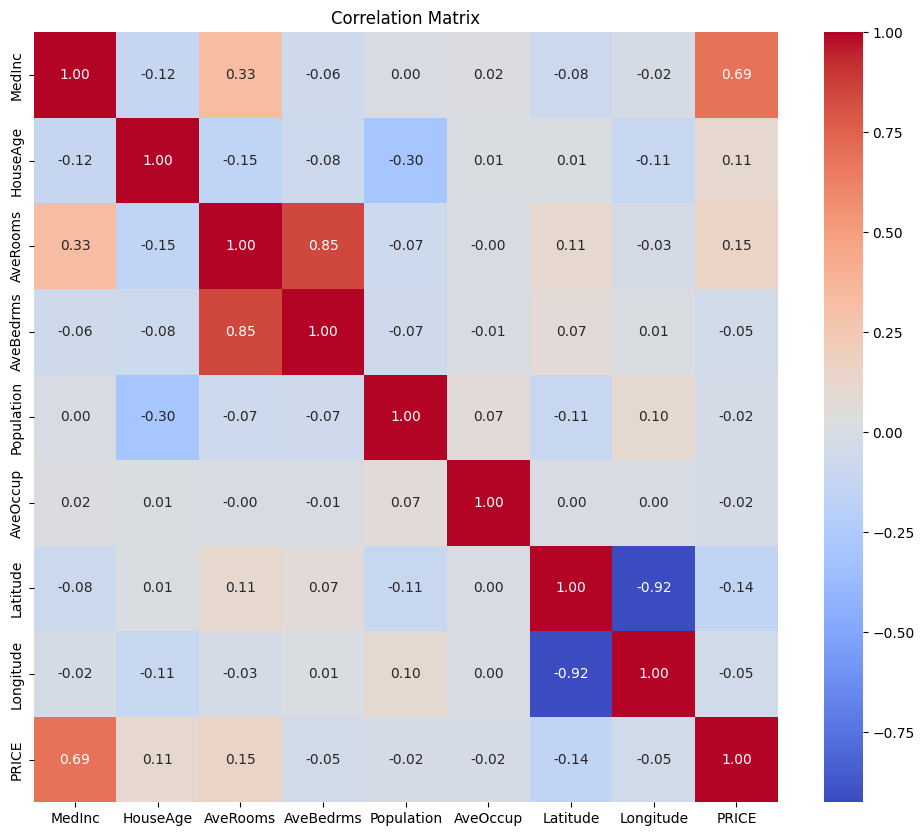

Training set shape: (14448, 8)
Testing set shape: (6192, 8)
Linear Regression Performance:
Mean Squared Error: 0.5306
Root Mean Squared Error: 0.7284
R² Score: 0.5958

Feature Coefficients:
      Feature   Coefficient
3   AveBedrms  7.785996e-01
0      MedInc  4.458226e-01
1    HouseAge  9.681868e-03
4  Population -7.757404e-07
5    AveOccup -3.370027e-03
2    AveRooms -1.220951e-01
6    Latitude -4.185367e-01
7   Longitude -4.336880e-01


In [2]:
# We will use Boston data which is available in scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# set random seed for reproducibility
np.random.seed(42)
# Load the california housing data
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target
#display(data)
print(f"Dataset shape: {data.shape}")
print(f"\nFeature names: {housing.feature_names}")
print(f"\nFirst 5 rows of our dataset: {data.head()}")
print(f"\nStatistical summary: {data.describe()}")

# Missing values -  NO MISSING VALUE
print(f"Missing values in each column: {data.isnull().sum()}")

# Visualize the distribution of house prices -HISTOGRAM
plt.figure(figsize=(10,6))
sns.histplot(data['PRICE'], kde=True, )
plt.title('Distribution of House Prices')
plt.xlabel('Prices (x $100k)')
plt.ylabel('Frequency')
plt.show()

#Correlation matrix to see relationship between features
correlation_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Split the data into features (X) and target (y)
X=data.drop('PRICE', axis=1)
y=data['PRICE']
# Split into tarining and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

#Train the model on training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
#Evaluate the model using test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Let's see the coefficients to understand feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)

### We will use LAZYPREDICT to see the top models

 98%|█████████▊| 41/42 [00:39<00:00,  1.24it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.069240


100%|██████████| 42/42 [00:40<00:00,  1.05it/s]


LazyPredict Model Comparison:
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.84       0.84  0.46        0.61
XGBRegressor                                 0.84       0.84  0.46        0.28
HistGradientBoostingRegressor                0.84       0.84  0.46        0.64
ExtraTreesRegressor                          0.81       0.81  0.50        1.70
RandomForestRegressor                        0.80       0.80  0.51        5.11
BaggingRegressor                             0.78       0.78  0.53        0.54
GradientBoostingRegressor                    0.78       0.78  0.54        1.85
MLPRegressor                                 0.78       0.78  0.54        1.94
NuSVR                                        0.74       0.74  0.59        3.50
SVR                                          0.73       0.73  0.59        3.60
KNeighborsRegressor  

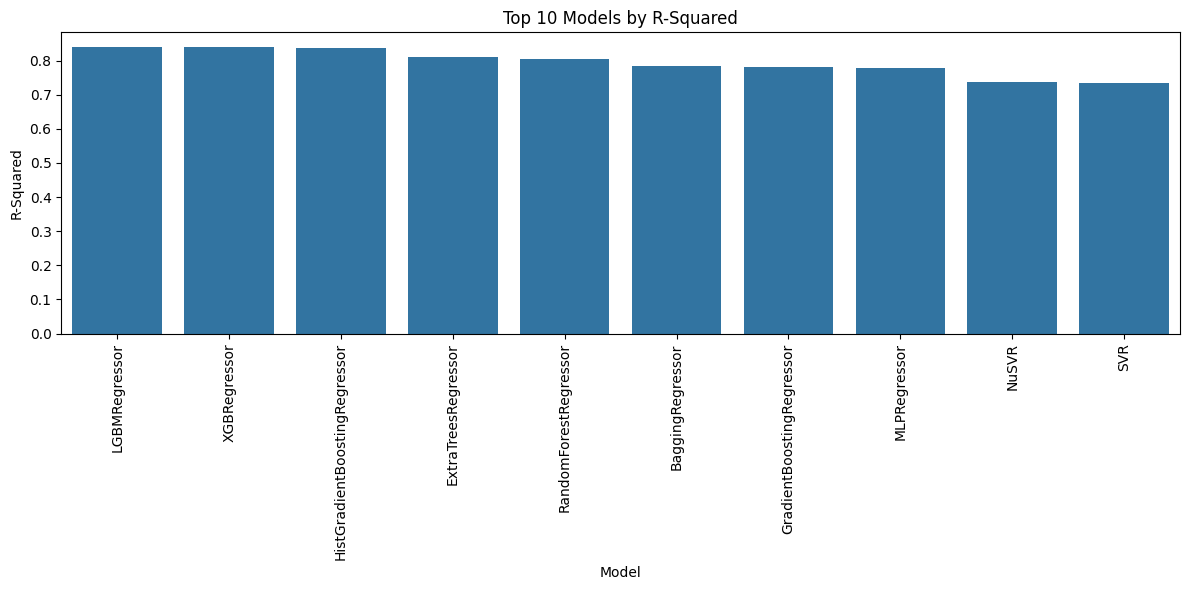

In [3]:
# Using LazyPredict to try multiple models quickly
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate multiple models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Display performance comparison of various models
print("\nLazyPredict Model Comparison:")
print(models)

# Let's visualize the top performing models
plt.figure(figsize=(12, 6))
models_r2 = models.sort_values(by='R-Squared', ascending=False).head(10)
sns.barplot(x=models_r2.index, y=models_r2['R-Squared'])
plt.xticks(rotation=90)
plt.title('Top 10 Models by R-Squared')
plt.tight_layout()
plt.show()

### We identified XGBoost is the top performing model, so we will train and hyperparameter tune it.

In [4]:
# Import XGB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
#Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(random=42)
# check basic performance with cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(f"XGBoost cross-validation R2 score: {cv_scores}")
print(f"Mean CV R2 score: {cv_scores.mean():.4f}")


XGBoost cross-validation R2 score: [0.82356697 0.81539044 0.82491629 0.82780249 0.83137232]
Mean CV R2 score: 0.8246


In [5]:
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate performance
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

<Figure size 1000x600 with 0 Axes>

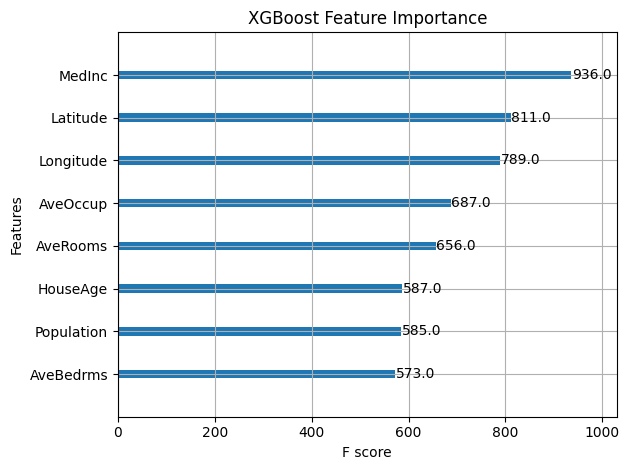

In [6]:
plt.figure(figsize=(10,6))
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [7]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [3,5,7],
    'learning_rate': [0.1,0.05]
}

grid_search = GridSearchCV(
    estimator= xgb.XGBRegressor(random=42),
    param_grid=param_grid,
    cv = 3,
    scoring='r2',
    verbose=1
)

# Fiting the grid search and getting result
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best R2 Score: 0.8297584016060714


In [8]:
# Final model with best parameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)
# Final Evaluation
final_pred = best_xgb.predict(X_test)
final_r2 = r2_score(y_test, final_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
#Print final results
print(f"Root Mean Squared Error: {final_rmse:.4f}")
print(f"R² Score: {final_r2:.4f}")

Root Mean Squared Error: 0.4578
R² Score: 0.8403


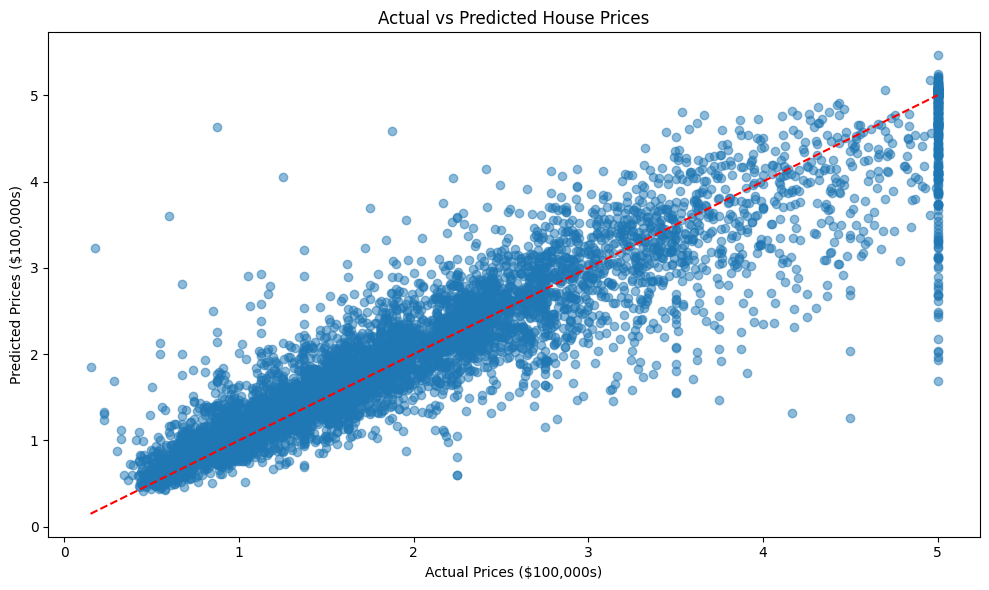

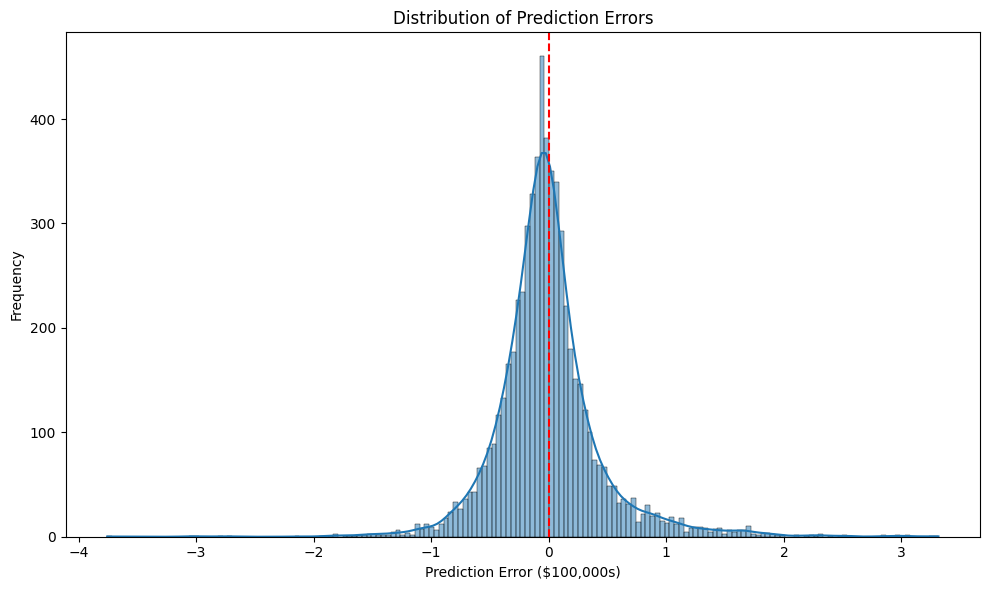

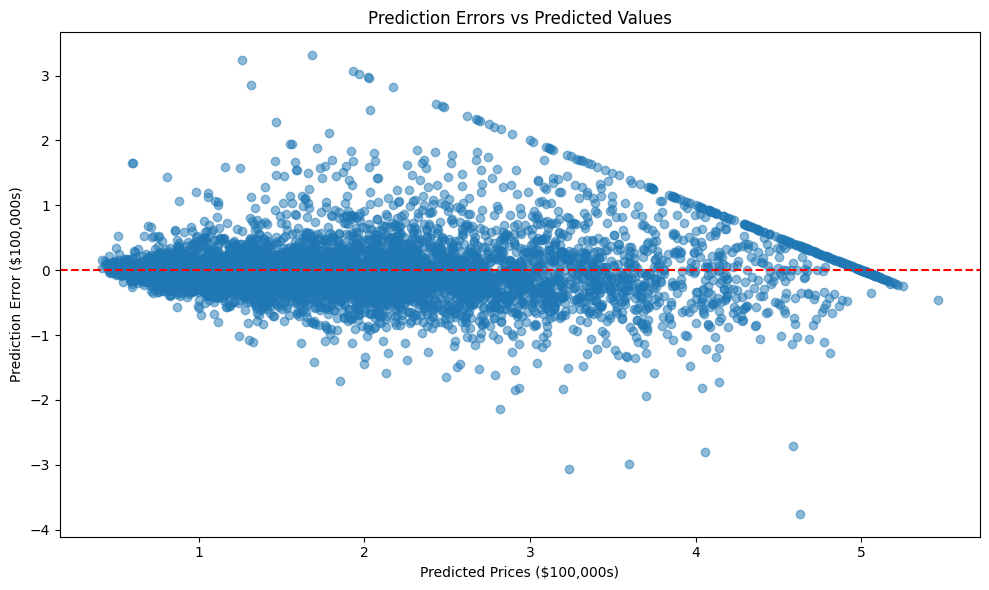

In [9]:
# VISULIZE
# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_pred
})
# Calculate prediction errors
results_df['Error'] = results_df['Actual'] - results_df['Predicted']

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices ($100,000s)')
plt.ylabel('Predicted Prices ($100,000s)')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Visualize error distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_df['Error'], kde=True)
plt.xlabel('Prediction Error ($100,000s)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Visualize errors vs predicted values (to check for patterns)
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Predicted'], results_df['Error'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices ($100,000s)')
plt.ylabel('Prediction Error ($100,000s)')
plt.title('Prediction Errors vs Predicted Values')
plt.tight_layout()
plt.show()
